# Import libraries

In [2]:
pip install --upgrade yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score


In [4]:
wine_data=pd.read_csv("wine.csv")
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# data Understanding

In [6]:
wine_data.Type.unique()

array([1, 2, 3], dtype=int64)

In [7]:
wine_data.Type.value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [8]:
wine_data['ID']=range(1,179,1)
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [9]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


Looking for some statistical information about each feature, we can see that features have very different scales


In [11]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
 14  ID               178 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 21.0 KB


In [12]:
wine_data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64

In [13]:
wine_data.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

# EDA

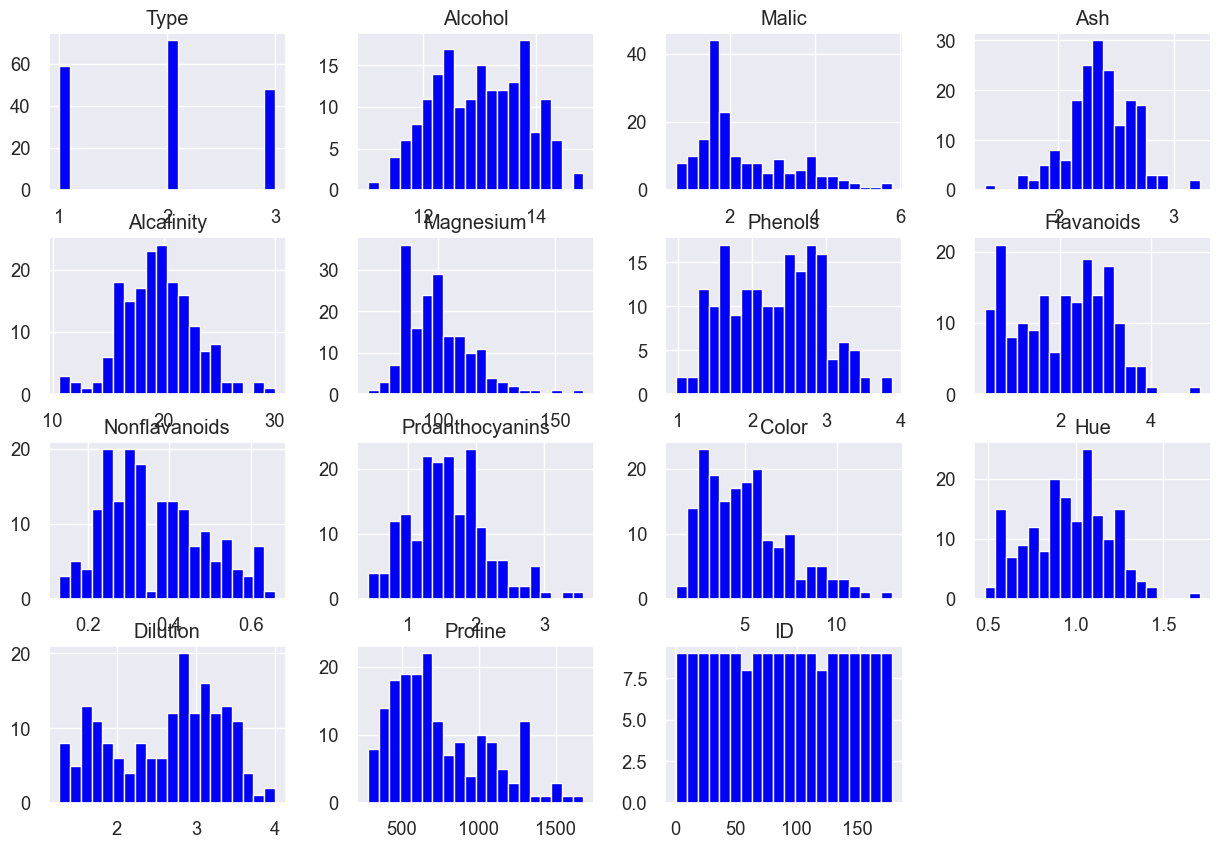

In [588]:
ax=wine_data.hist(bins=20,color='blue')

# Outlers Detection


In [592]:
wine_data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

C:\Users\LAPTOPCOM\AppData\Local\Temp\ipykernel_12132\1184306130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Alcohol',data=outlier,palette='crest',ax=axes[0])
C:\Users\LAPTOPCOM\AppData\Local\Temp\ipykernel_12132\1184306130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Malic',data=outlier,palette='crest',ax=axes[1])
C:\Users\LAPTOPCOM\AppData\Local\Temp\ipykernel_12132\1184306130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ash',data=outlier,palette='crest',ax=axes[2])
C:\Users\LAPTOPCOM\AppData\Local\Temp\ipyke

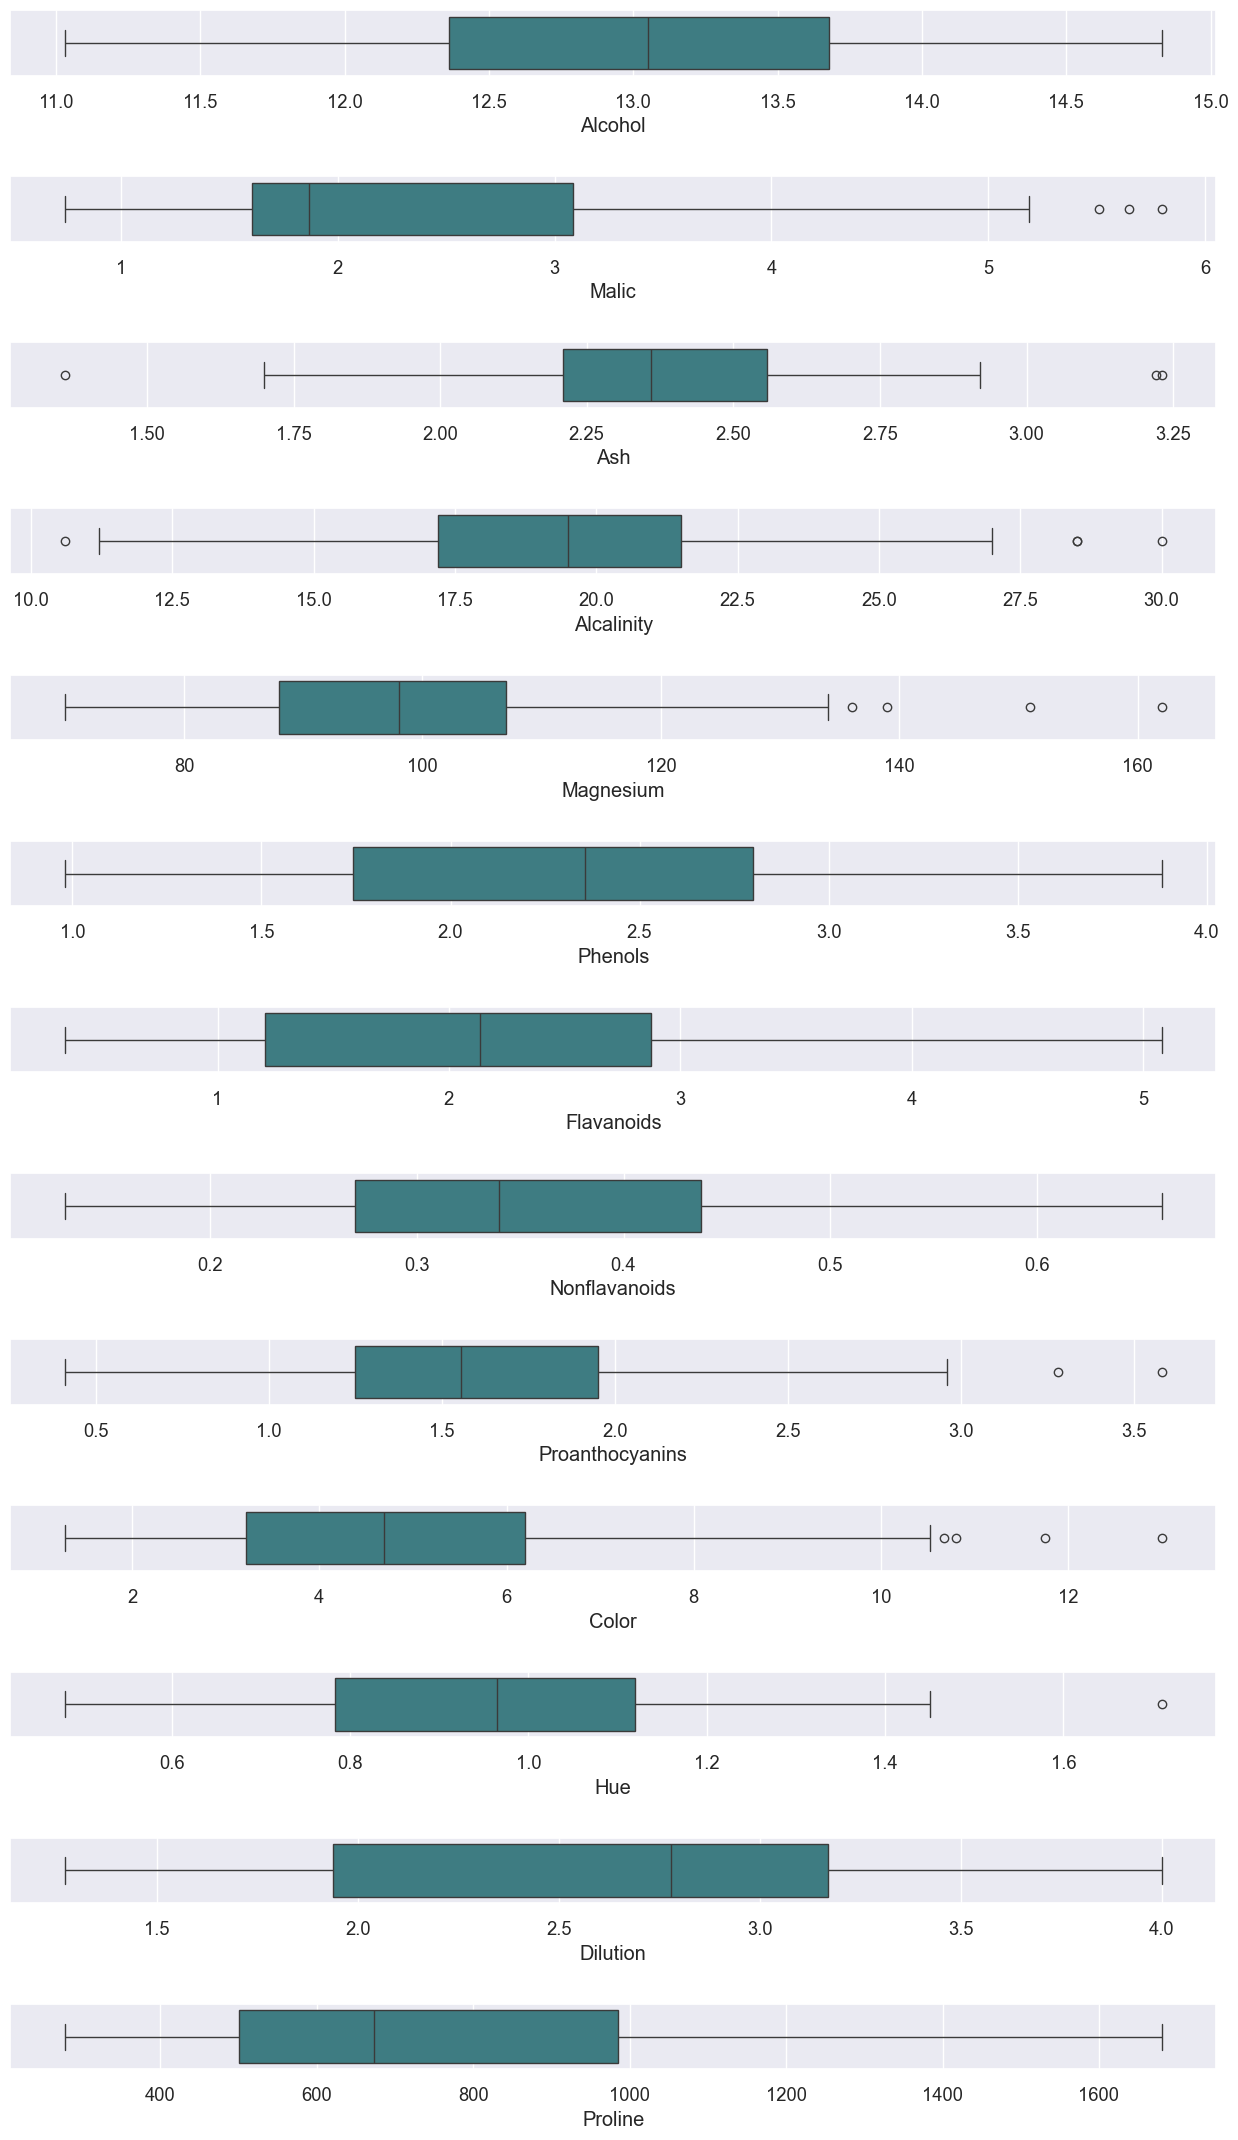

In [594]:
outlier=wine_data.copy()
fig, axes=plt.subplots(13,1, figsize=(13,22),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=outlier,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=outlier,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=outlier,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=outlier,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)


# Correlation Heatmap

ValueError: Format specifier missing precision

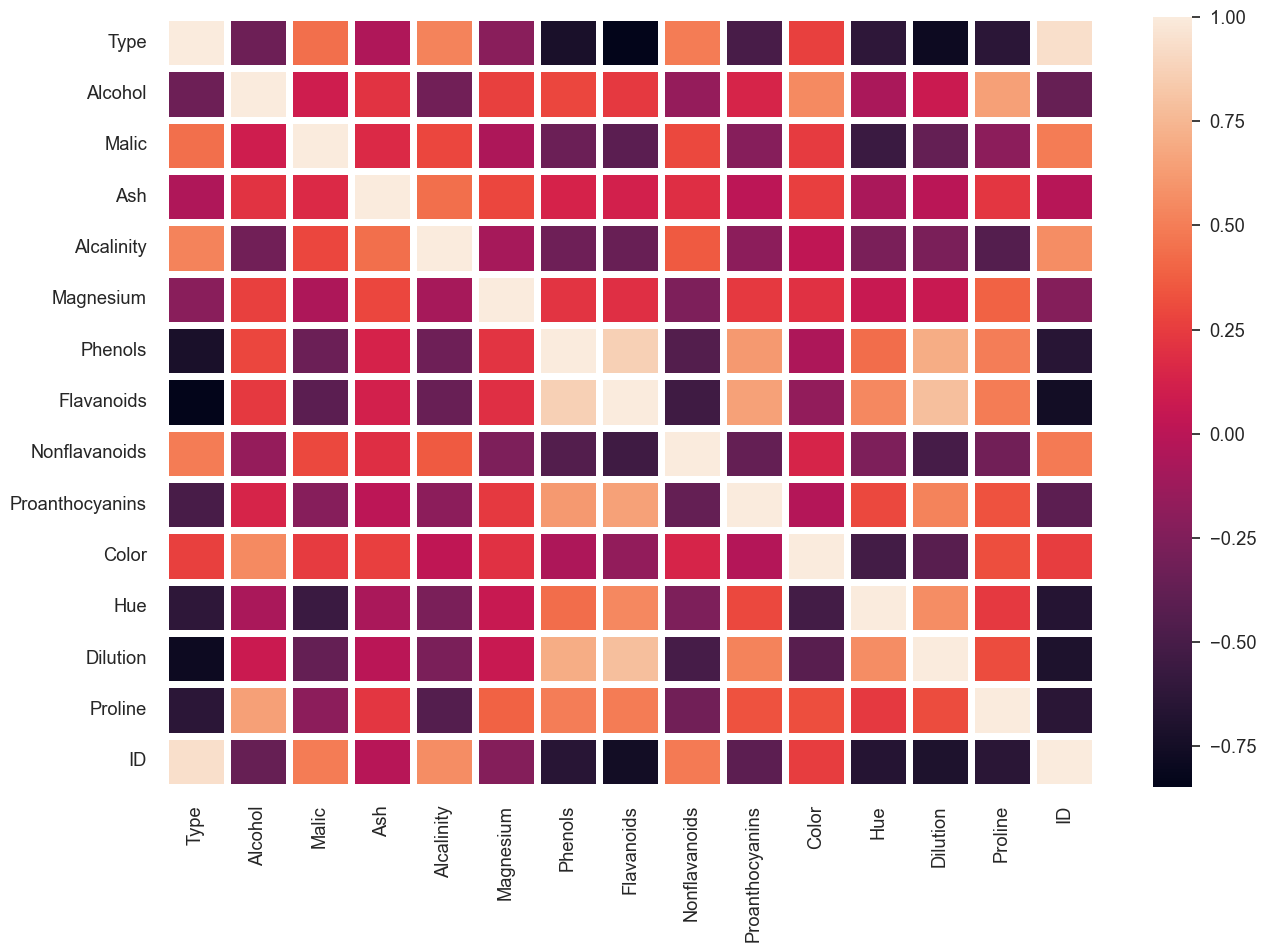

In [596]:
f,ax=plt.subplots(figure=(12,10))
sns.heatmap(wine_data.corr(),annot=True, linewidths=5,fmt='.lf',ax=ax)
plt.show()

Unique points in this corelation matrix:

Pheolsl id positively correlated with Flavanoids, Dilution and Proanthocyanins
Flavanoids is positively correlated with Proanthocyanins and Dilution
Dilution is positively correlated with Hue
Alcohol is positively correlated with Proline



# Plotting frequent flying Phenols vs. Flavanoids

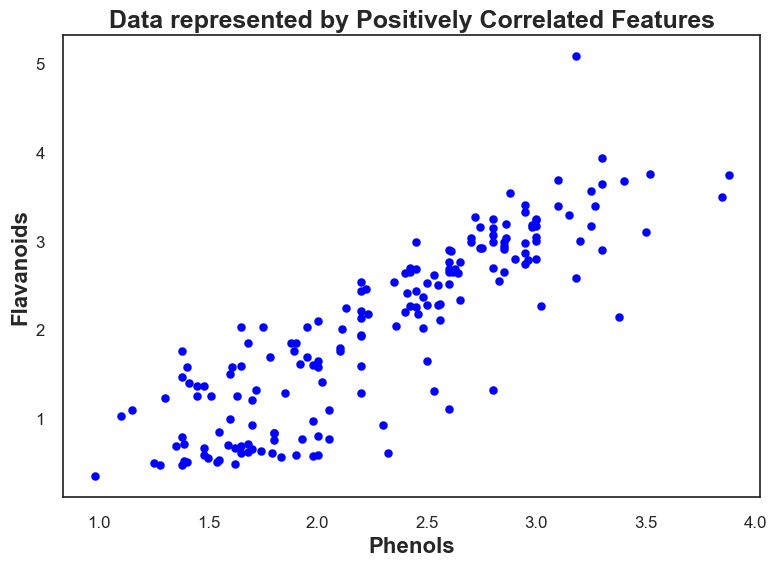

In [598]:
sns.set(style='white', rc={ 'figure.figsize':(9,6)}, font_scale=1.1)
plt.scatter(x= wine_data['Phenols'], y= wine_data['Flavanoids'], color='blue', lw=0.1)
plt.xlabel('Phenols',fontweight='bold', fontsize=16)
plt.ylabel('Flavanoids',fontweight='bold', fontsize=16)
plt.title('Data represented by Positively Correlated Features',fontweight='bold',fontsize= 18)
plt.show()

        

# Data Processing

In [600]:
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5


In [602]:
wine_df=wine_data.set_index('ID')
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ID,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Applying standard Scaler on the data

In [604]:

standard_scaler = StandardScaler()
std_wine = standard_scaler.fit_transform(wine_data)
std_wine.shape

(178, 15)

# Applying MinMaxScaler On Dataset

In [606]:
minmax = MinMaxScaler()

norm_wine = minmax.fit_transform(wine_data)
norm_wine.shape

(178, 15)

# PCA(Principal Component Analysis)
1] PCA on stanadard scales dataset

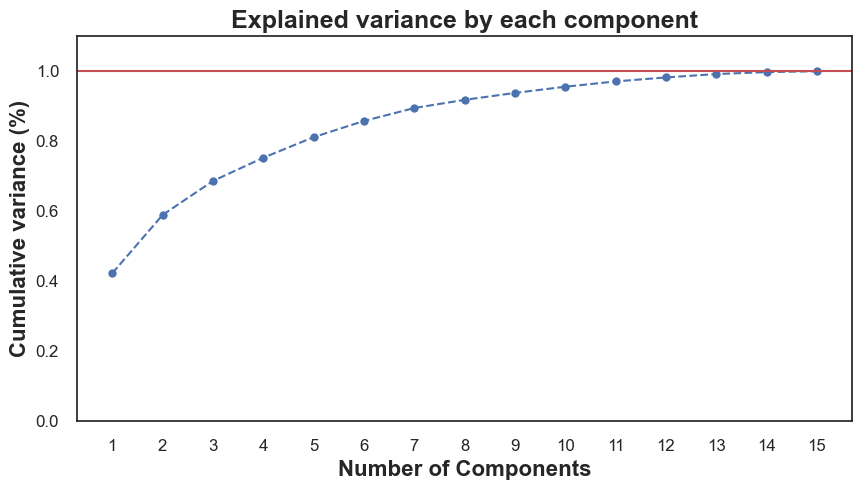

In [608]:
pca_var=PCA()
pca_var.fit(std_wine)

#plot
plt.figure(figsize=(10,5))
xi=np.arange(1,1+std_wine.shape[1],step=1)
yi=np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi,yi,marker='o', linestyle='--', color='b')

#Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components',fontweight='bold', fontsize=16)
plt.xticks(np.arange(1, 1+std_wine.shape[1], step=1))
plt.ylabel('Cumulative variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)



# The amount of variance that each PCA explains is


In [610]:
var=pca_var.explained_variance_ratio_
var

array([0.42315618, 0.16647321, 0.09699353, 0.06632946, 0.05877432,
       0.04624981, 0.03695786, 0.0233517 , 0.01982763, 0.01765908,
       0.0151364 , 0.01143312, 0.00964268, 0.00560632, 0.0024087 ])

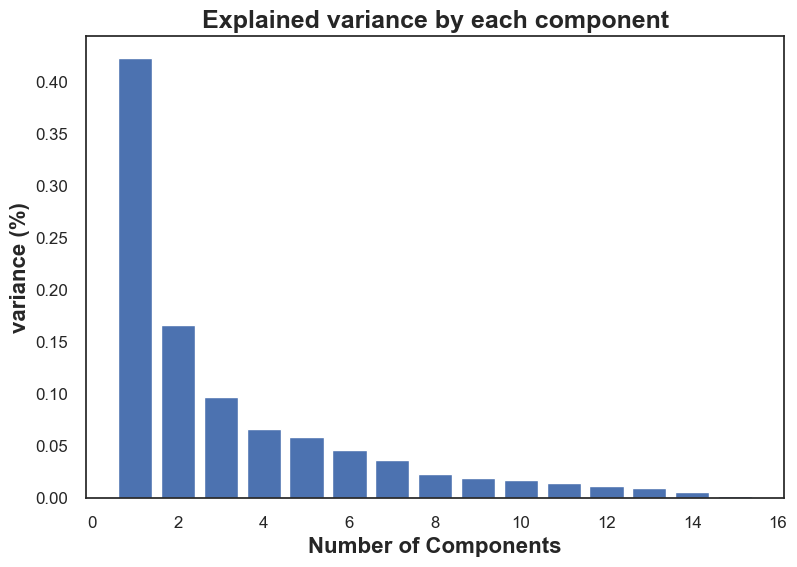

In [612]:
plt.bar(range(1, len(var) + 1), var)
plt.xlabel('Number of Components', fontweight='bold', fontsize=16)
plt.ylabel('variance (%)', fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.show()

# Cumulative Variance

In [614]:
var1= np.cumsum(np.round(var, decimals=4)*100)
var1

array([ 42.32,  58.97,  68.67,  75.3 ,  81.18,  85.8 ,  89.5 ,  91.84,
        93.82,  95.59,  97.1 ,  98.24,  99.2 ,  99.76, 100.  ])

In [616]:
pca=PCA(n_components=3)
pca_std=pca.fit_transform(norm_wine)

#convert to data frame
pca_std_wine=pd.DataFrame(data=pca_std,columns=['PC1','PC2','PC3'])

#shape and preview
print(pca_std_wine.shape)
pca_std_wine.head()

(178, 3)


,PC1,PC2,PC3
0,-0.979144,-0.241592,0.032566
1,-0.827752,-0.009548,-0.291197
2,-0.838919,-0.183929,0.127351
3,-1.050659,-0.561901,0.160457
4,-0.613267,-0.068768,0.051951


PCA plot in 2D

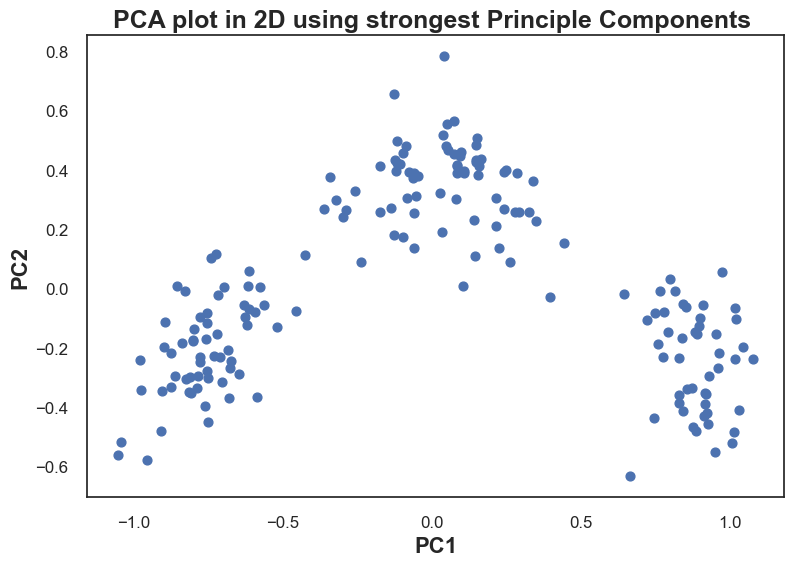

In [618]:
plt.figure(figsize=(9,6))

#scatter plot
plt.scatter(pca_std_wine.iloc[:,0],pca_std_wine.iloc[:,1], s=40)
#Asethetics
plt.title("PCA plot in 2D using strongest Principle Components ",fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()


PCA on MinMax Scaled Dataset

In [620]:
pca_var=PCA()
pca_var.fit(norm_wine)

PCA()

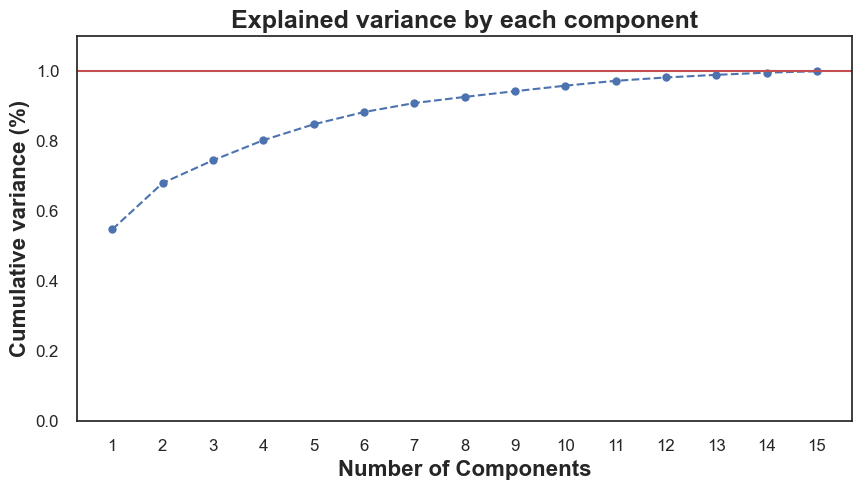

In [622]:
plt.figure(figsize=(10,5))
xi=np.arange(1, 1+norm_wine.shape[1], step=1)
yi=np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi,yi, marker="o", linestyle='--', color='b')

#Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components',fontweight='bold', fontsize=16)
plt.xticks(np.arange(1, 1 + norm_wine.shape[1], step=1))
plt.ylabel('Cumulative variance (%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)



The amount of variance that each PCA explain is

In [624]:
var=pca_var.explained_variance_ratio_


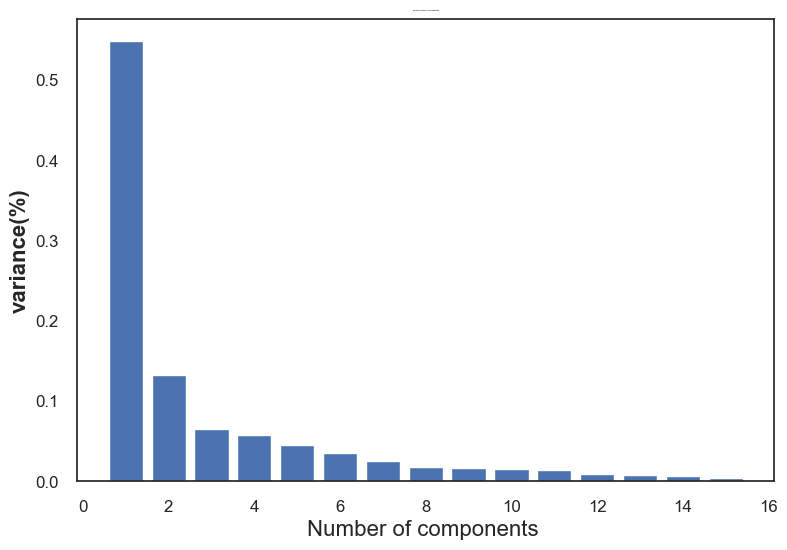

In [626]:
plt.bar(range(1,len(var)+1),var)
plt.xlabel('Number of components ', fontsize=16)
plt.ylabel('variance(%)',fontweight='bold', fontsize=16)
plt.title('Explained variance by each component ', fontweight='bold',fontsize=1)
plt.show()           

Cumulative variance

In [628]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 54.83,  68.07,  74.55,  80.29,  84.83,  88.34,  90.91,  92.66,
        94.29,  95.87,  97.26,  98.22,  98.97,  99.6 , 100.  ])

In [630]:
pca=PCA(n_components=3)
pca_norm=pca.fit_transform(norm_wine)

#convert to dataframe
pca_norm_wine=pd.DataFrame(data=pca_norm,columns=['PC1','PC2','PC3'])

# shape and preview
print(pca_norm_wine.shape)
pca_norm_wine.head()

(178, 3)


,PC1,PC2,PC3
0,-0.979144,-0.241592,0.032566
1,-0.827752,-0.009548,-0.291197
2,-0.838919,-0.183929,0.127351
3,-1.050659,-0.561901,0.160457
4,-0.613267,-0.068768,0.051951


The new columns are called Principal Components (PC's) and give the coordinates of the data in the new smaller space
PCA plot in 2D

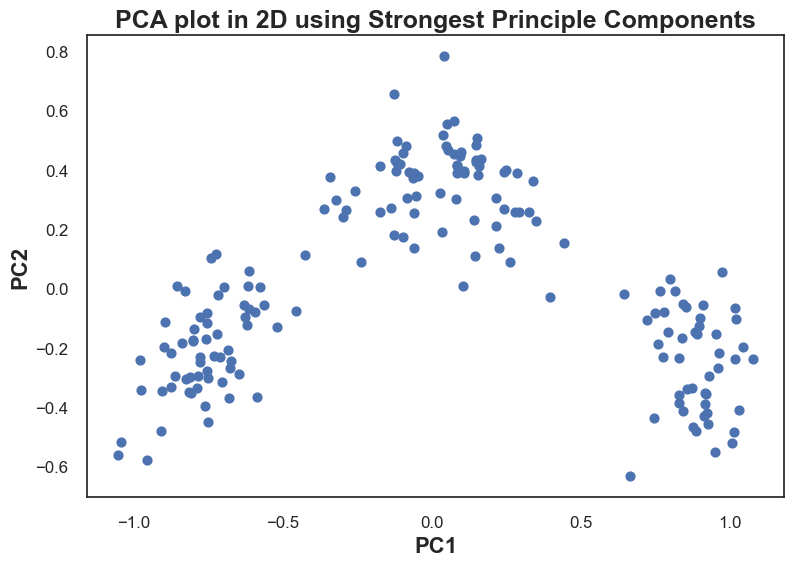

In [632]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], s=40)

plt.title('PCA plot in 2D using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

# KMeans clustering


Elbow Method for Determining Cluster Amount on PCA Standard Scaled Dataset

In [634]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_wine)
    inertia.append(kmeans.inertia_)

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|██████████▌                                                                         | 1/8 [00:01<00:08,  1.21s/it]C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|█████████████████████                                                               | 2/8 [00:02<00:07,  1.24s/it]C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\clus

In [642]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_wine)
    silhouette[i] = sil(pca_std_wine, kmeans.labels_, metric='euclidean')

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|██████████▌                                                                         | 1/8 [00:01<00:07,  1.08s/it]C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|█████████████████████                                                               | 2/8 [00:02<00:07,  1.23s/it]C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\clus

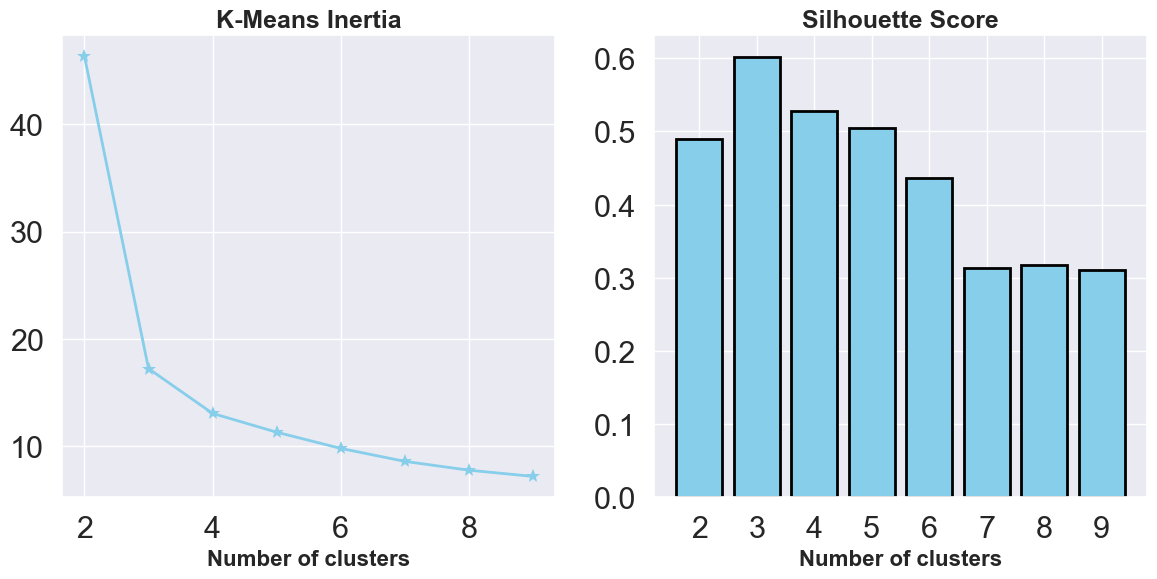

In [637]:
sns.set(style="darkgrid", rc={'figure.figsize':(14,6)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters", fontweight='bold', fontsize=16)
plt.title("K-Means Inertia", fontweight='bold', fontsize= 18)

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters",fontweight='bold', fontsize=16)
plt.title("Silhouette Score", fontweight='bold', fontsize= 18)
plt.show()


Silhouette Score



C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memor

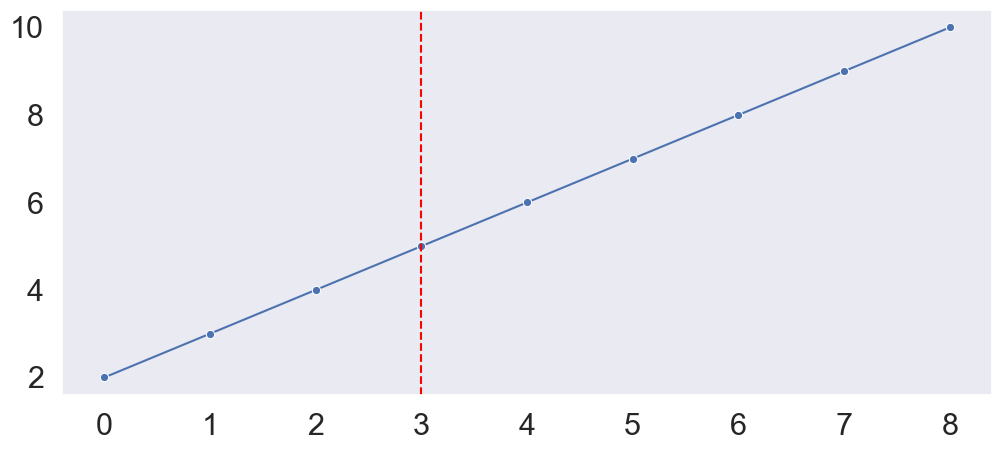

In [644]:
from sklearn.metrics import silhouette_score
n_clusters=[2,3,4,5,6,7,8,9,10] # number for clusters
clusters_inertia=[]#inertia of clusters
s_scores=[] #silhouette score

for n in n_clusters:
    KM_est=KMeans(n_clusters=n, init='k-means++').fit(pca_std_wine)
    clusters_inertia.append(KM_est.inertia_)
    silhouette_avg=silhouette_score(pca_std_wine, KM_est.labels_)
    s_scores.append(silhouette_avg)

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, marker='o', ax=ax)
# ax.set_title("Silhouette score method",fontweight='bold', fontsize=18)
# ax.set_xlabel("number of clusters", fontweight='bold', fontsize=16)
# ax.set_ylabel("Silhouette score", fontweight='bold', fontsize=16)
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()


Elbow Plot for Standard Scaler data


C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memor

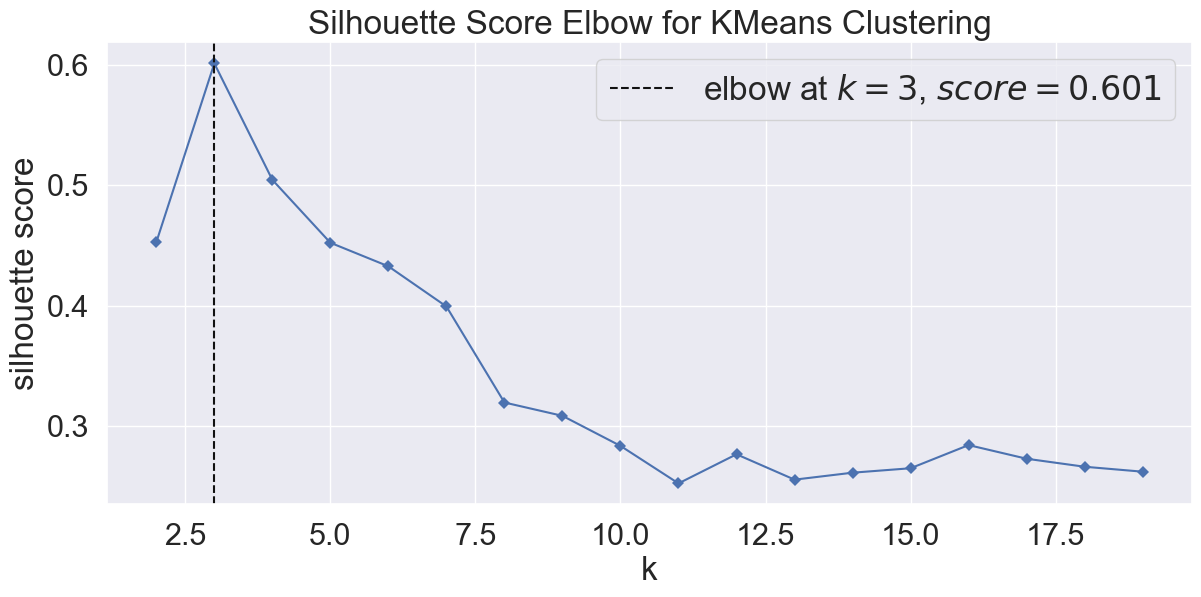

In [646]:
model=KMeans(random_state=10, max_iter=500, init='k-means++')

#Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer=KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
print('Elbow Plot for Standard Scaler data')
visualizer.fit(pca_std_wine)    
visualizer.show()
plt.show()

With the elbow method, the ideal number of clusters to use was 6.
We will also use the Silhouette score to determine an optimal number.

In [648]:
clust_list=[2,3,4,5,6,7,8,9]
#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_wine)
    sil_score1 = sil(pca_std_wine, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)


C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5120014206889355
For n_clusters = 3 The average silhouette_score is : 0.6010807506294994


C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5279365784702806
For n_clusters = 5 The average silhouette_score is : 0.5036680304557011


C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3717153018465674
For n_clusters = 7 The average silhouette_score is : 0.3020874561331822


C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.30858670188147647
For n_clusters = 9 The average silhouette_score is : 0.29436803534202516


Conclusion:
According the the silhouette score of:

The standardized data, the ideal number of clusters is 3, with a score higher than other options, of 0.51


Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset

we have found good number of clusters =3)
Model building using cluster numbers=3)


In [650]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_wine)
y_predict_kmeans.shape

C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(178,)

In [652]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [654]:
model_kmeans.labels_


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [656]:
model_kmeans.cluster_centers_


array([[ 0.03490941,  0.34955649,  0.01291103],
       [ 0.87148327, -0.24331724,  0.00588247],
       [-0.75185715, -0.20328088, -0.0196517 ]])

Within-cluster sum of squared

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster.

Therefore the smaller the inertia the denser the cluster (closer together all the points are)

In [658]:
model_kmeans.inertia_


17.208254570526993

Assign clusters to the data set

In [660]:
wine_df['Kmeans_Label'] = model_kmeans.labels_


In [662]:
wine_df.groupby('Kmeans_Label').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,2.000000,12.257246,1.908551,2.238551,20.063768,94.043478,2.252609,2.076232,0.362319,1.625652,3.057971,1.055739,2.786232,512.826087
1,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
2,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333


C:\Users\LAPTOPCOM\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


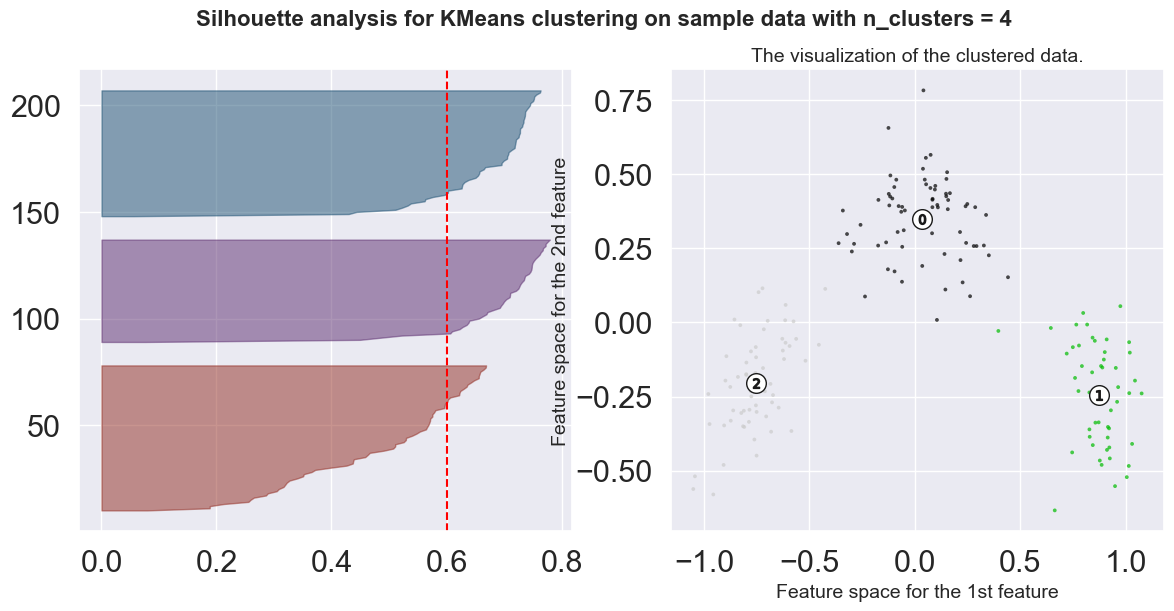

In [664]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1, ax2)=plt.subplots(1,2, sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_wine)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 3 is number of clusters
ax2.scatter(pca_norm_wine.iloc[:, 0],pca_norm_wine.iloc[:, 1],marker='.',s=30, lw=0,alpha=0.7,c=colors1,edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.", fontsize=14)
ax2.set_xlabel("Feature space for the 1st feature", fontsize=14)
ax2.set_ylabel("Feature space for the 2nd feature", fontsize=14)
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 4), fontsize=16, fontweight='bold')
#sil_visualizer1.show()
plt.show()


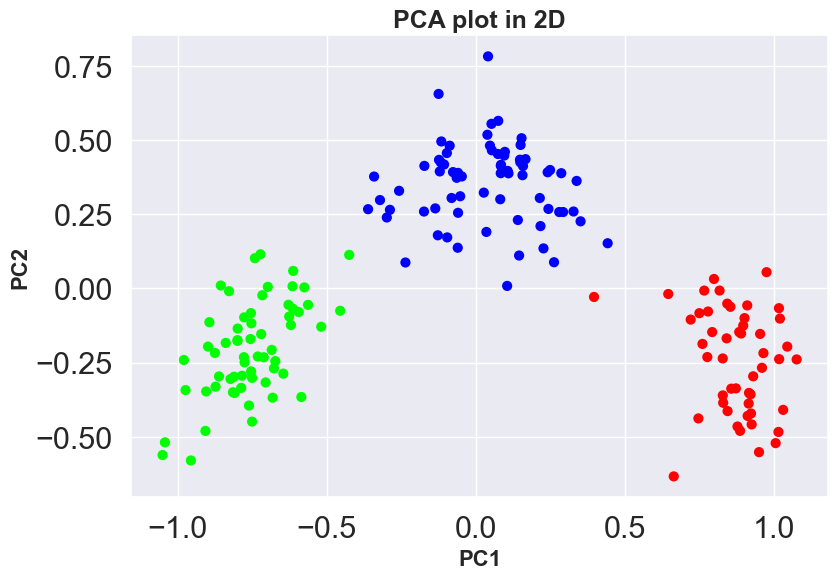

In [666]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)

plt.title('PCA plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

We can now clearly see the 3 number of clusters formed


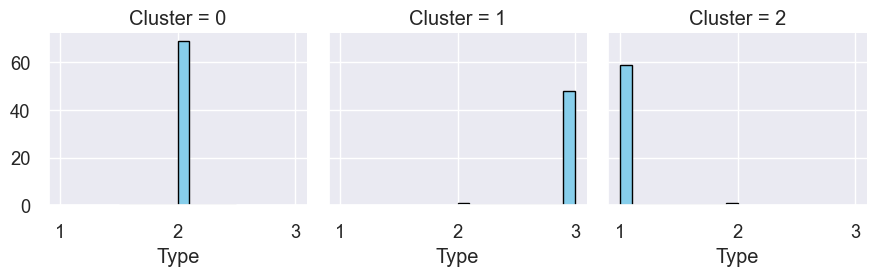

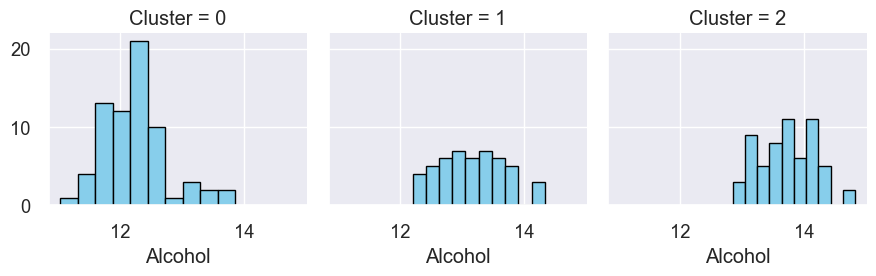

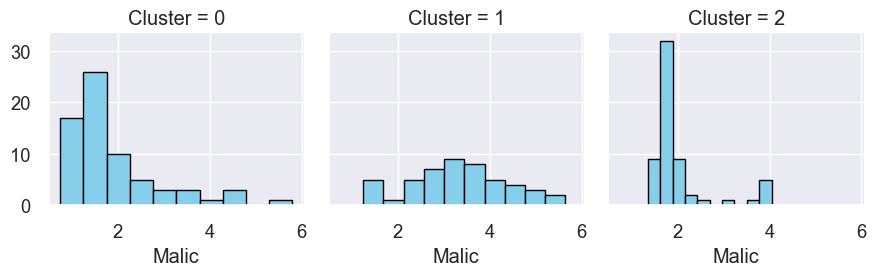

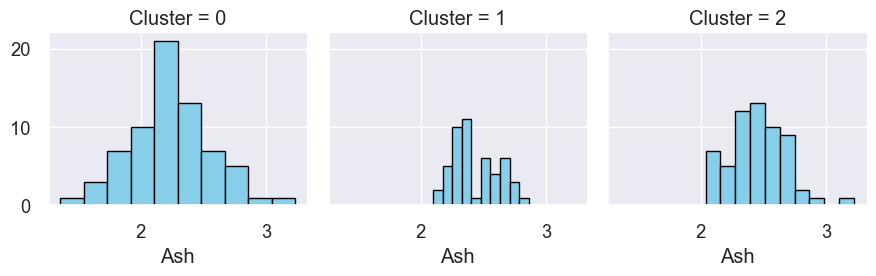

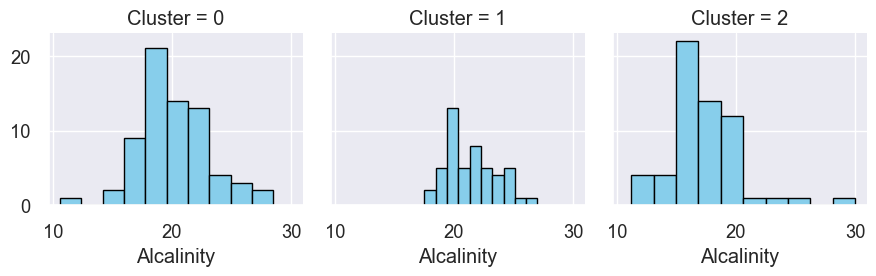

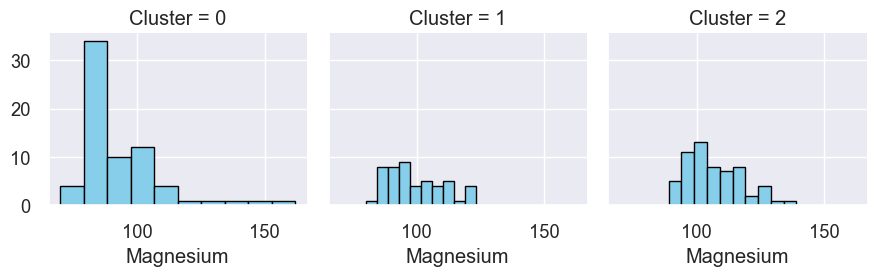

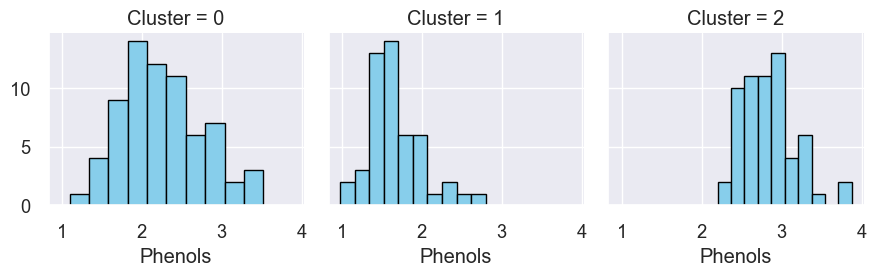

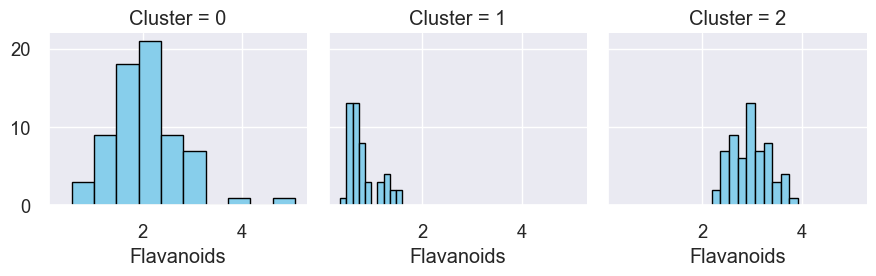

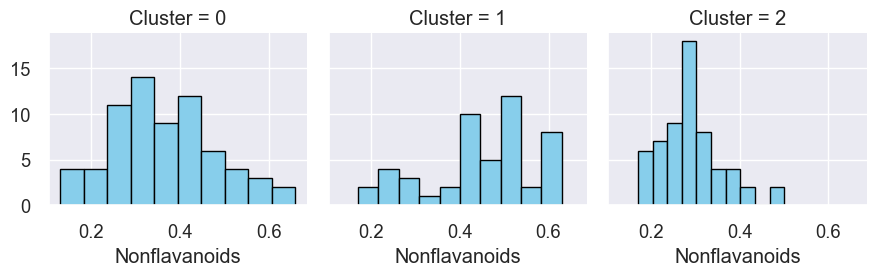

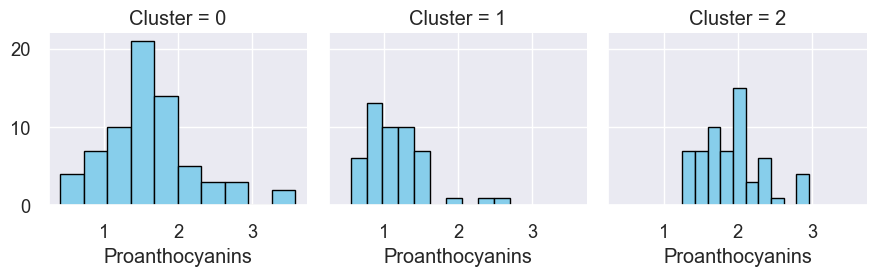

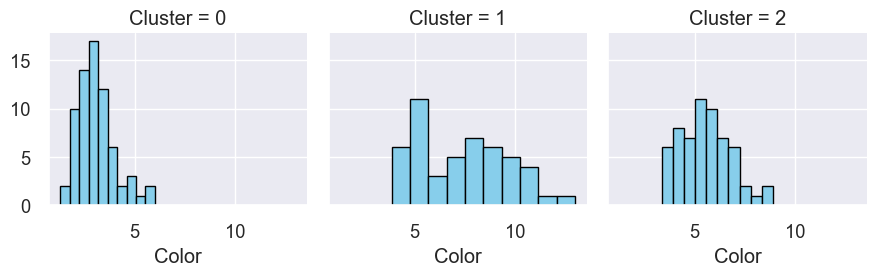

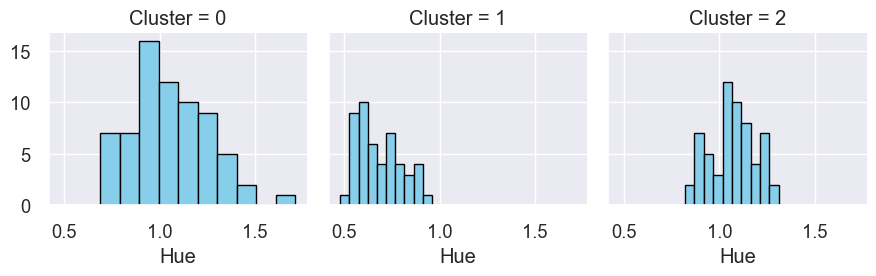

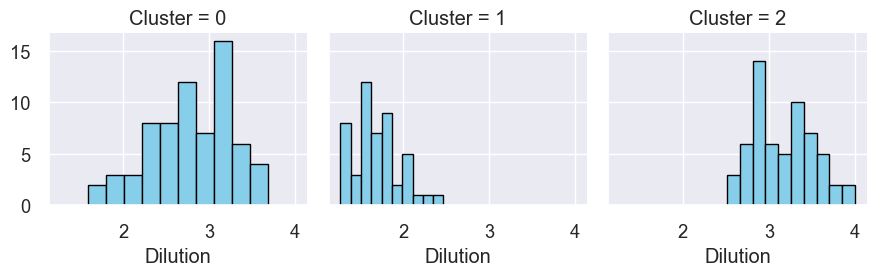

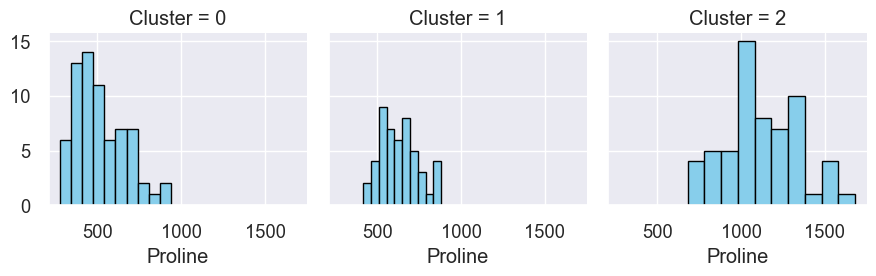

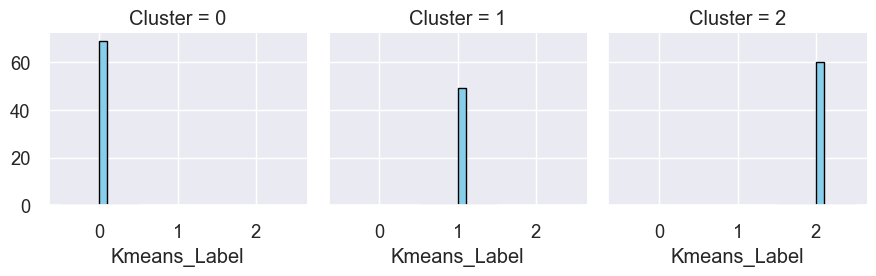

In [668]:
wine_df1 = wine_df.copy()
wine_df1['Cluster'] = model_kmeans.labels_

aux = wine_df1.columns.tolist()
aux[0:len(aux)-1]
sns.set(style="darkgrid", rc={'figure.figsize':(15,10)}, font_scale=1.2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(wine_df1, col="Cluster")
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

Sorting elements based on cluster label assigned and taking average for insights.

In [669]:
cluster1 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==1].mean(),columns= ['Cluster2_Avg'])
cluster3 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==2].mean(),columns= ['Cluster2_Avg'])
avg_wine = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_wine

,Cluster1_Avg,Cluster2_Avg,Cluster2_Avg
Type,2.000000,2.979592,1.016667
Alcohol,12.257246,13.151633,13.732167
Malic,1.908551,3.344490,2.005000
Ash,2.238551,2.434694,2.458000
Alcalinity,20.063768,21.438776,17.253333
Magnesium,94.043478,99.020408,106.883333
Phenols,2.252609,1.678163,2.847833
Flavanoids,2.076232,0.797959,2.980833
Nonflavanoids,0.362319,0.450816,0.288667
Proanthocyanins,1.625652,1.163061,1.900333


Comparing Kmeans Clusters with the Original Classified Dataset using "Type" Feature


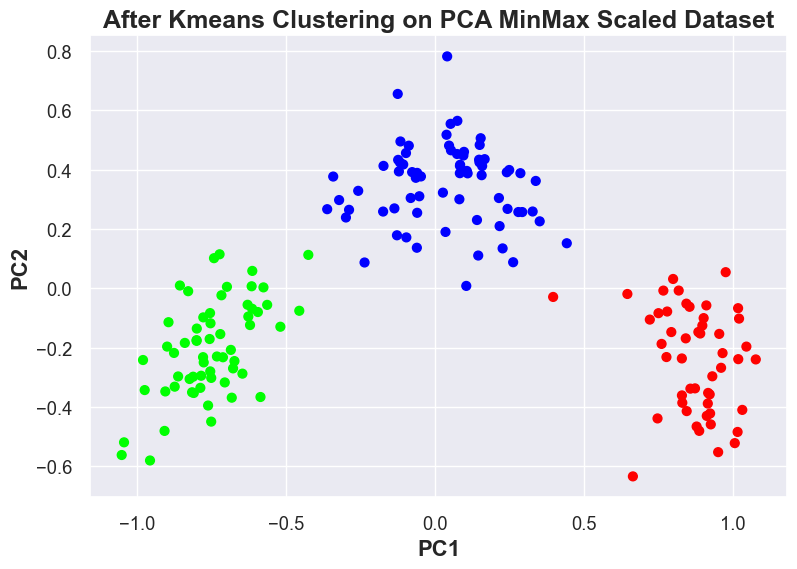

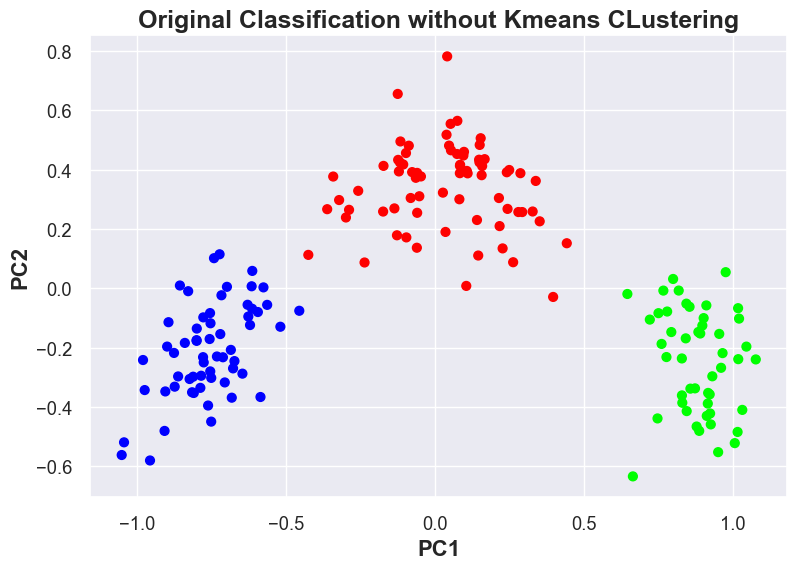

In [670]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)
plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_data['Type'], cmap="brg", s=40)
plt.title('Original Classification without Kmeans CLustering',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

In [535]:
display('After Applying PCA and Kmens CLustering on Dataset',wine_df.groupby('Kmeans_Label').agg(['mean']),'Original Classified Dataset',wine_data.groupby('ID').agg(['mean']))


'After Applying PCA and Kmens CLustering on Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,2.000000,12.257246,1.908551,2.238551,20.063768,94.043478,2.252609,2.076232,0.362319,1.625652,3.057971,1.055739,2.786232,512.826087
1,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
2,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333


'Original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,,
1,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
175,3.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


Observation:
The Type 2 has been perfectly clustered and rest has negliglable amount of difference
We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column

# t_SNE

In [671]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(norm_wine)

tsne_df = pd.DataFrame(data = X_tsne, columns = ['t-SNE Comp. 1', 't-SNE Comp. 2'])

print(tsne_df.shape)
tsne_df.head()

(178, 2)


,t-SNE Comp. 1,t-SNE Comp. 2
0,-17.977247,-0.125577
1,-15.789052,2.987527
2,-18.471075,3.348735
3,-20.616211,1.627867
4,-14.228046,0.387448


t-SNE plot in 2D coloured by class

Like PCA, t-SNE is an unsupervised algorithm, however we will use the same k-Means clusters from before to colour code the data points.

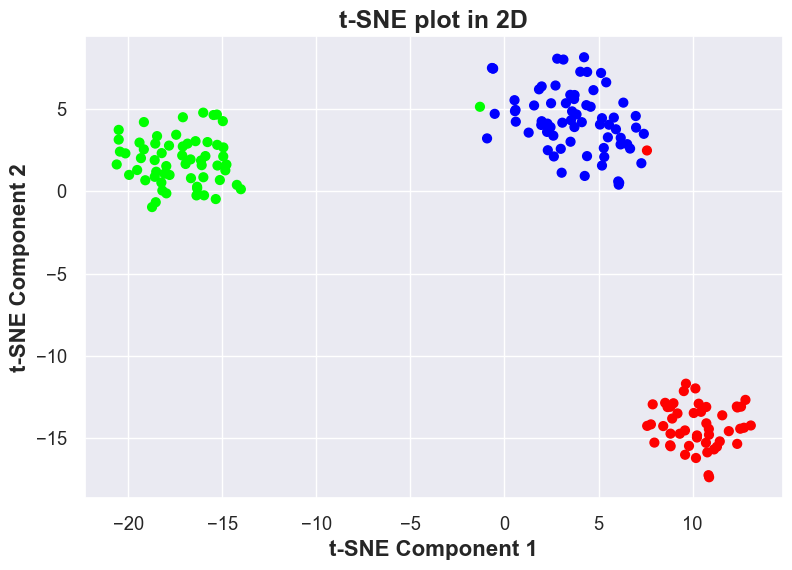

In [678]:
plt.figure(figsize=(9,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)

plt.title('t-SNE plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('t-SNE Component 1', fontweight='bold', fontsize=16)
plt.ylabel('t-SNE Component 2', fontweight='bold', fontsize=16)
plt.show()


# Hierarchical Clustering Algorithm

Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.

Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding.

Ward method is commanly used since it is simpler to visualize understanding.

Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

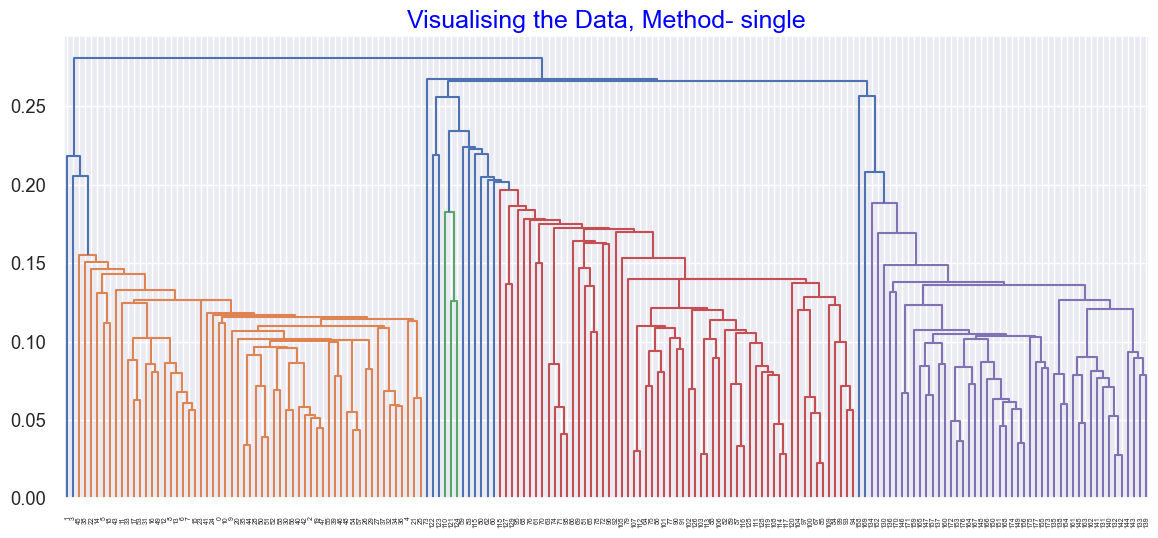

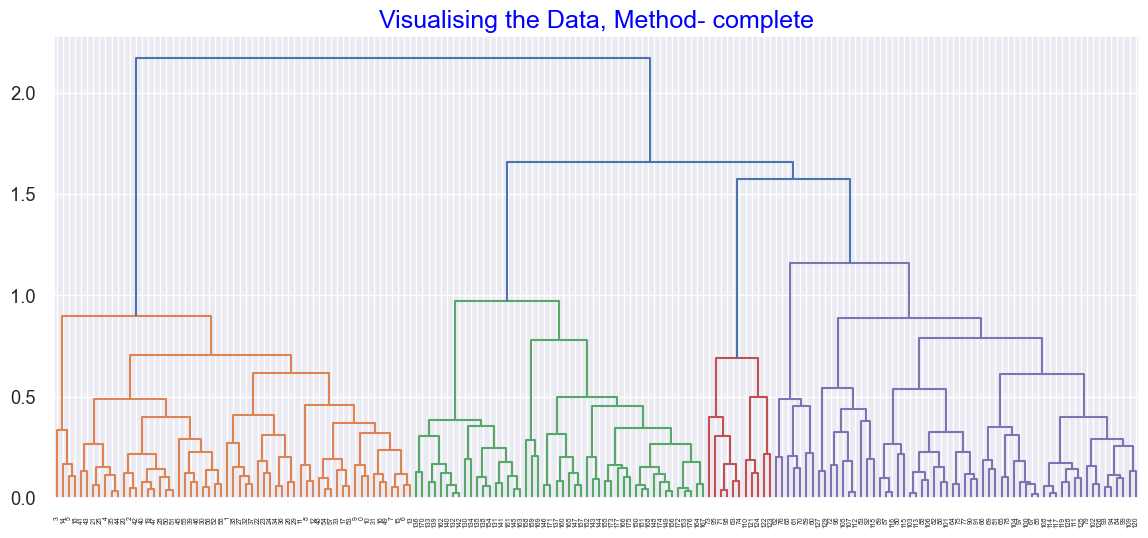

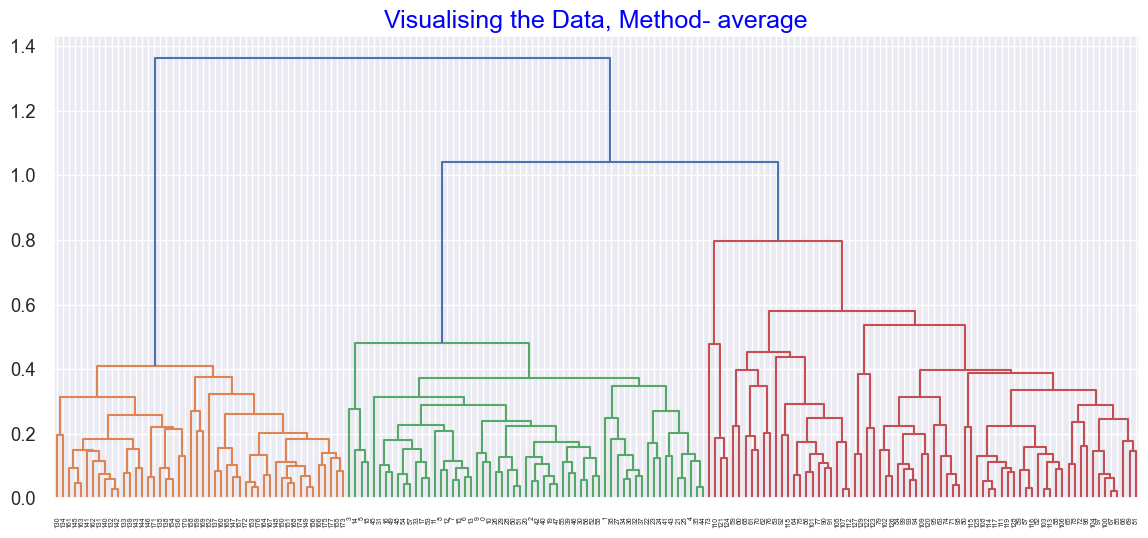

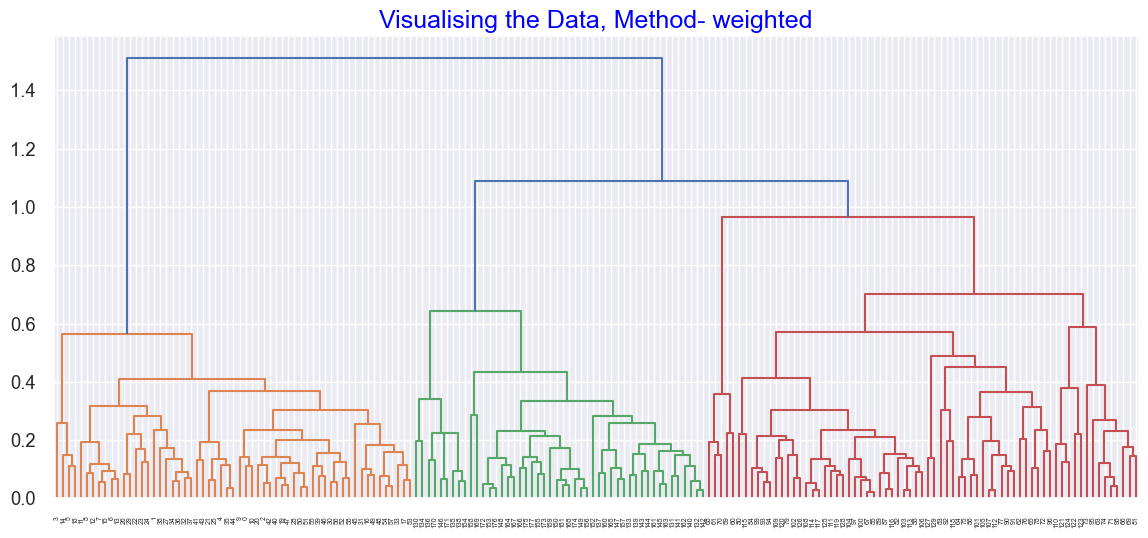

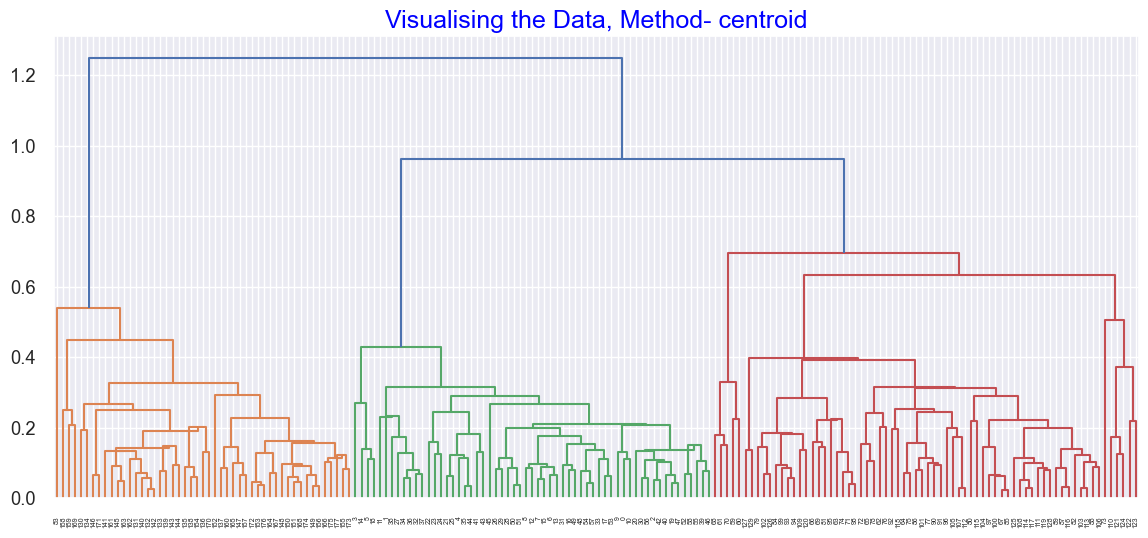

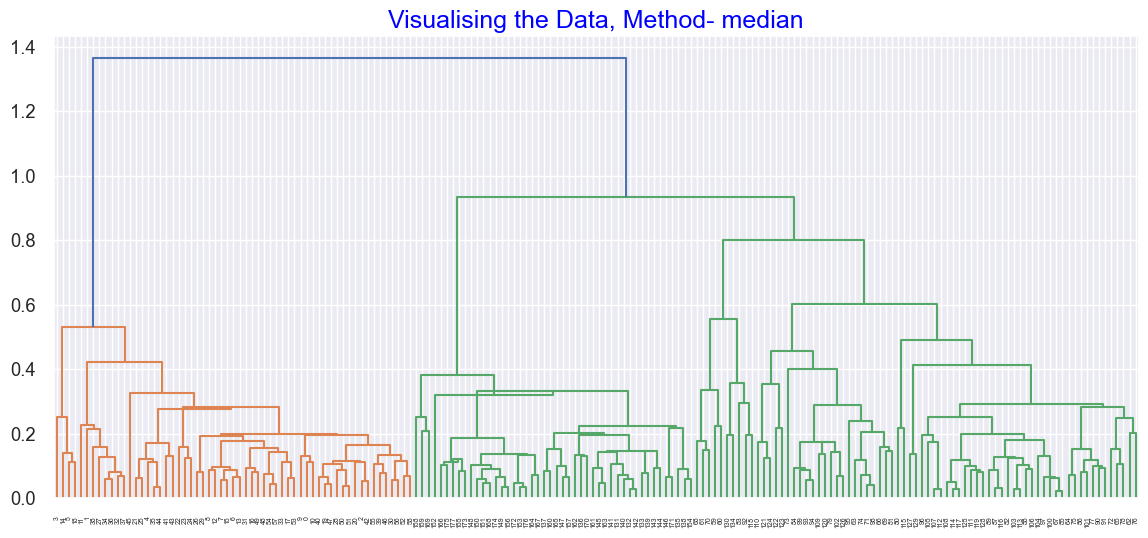

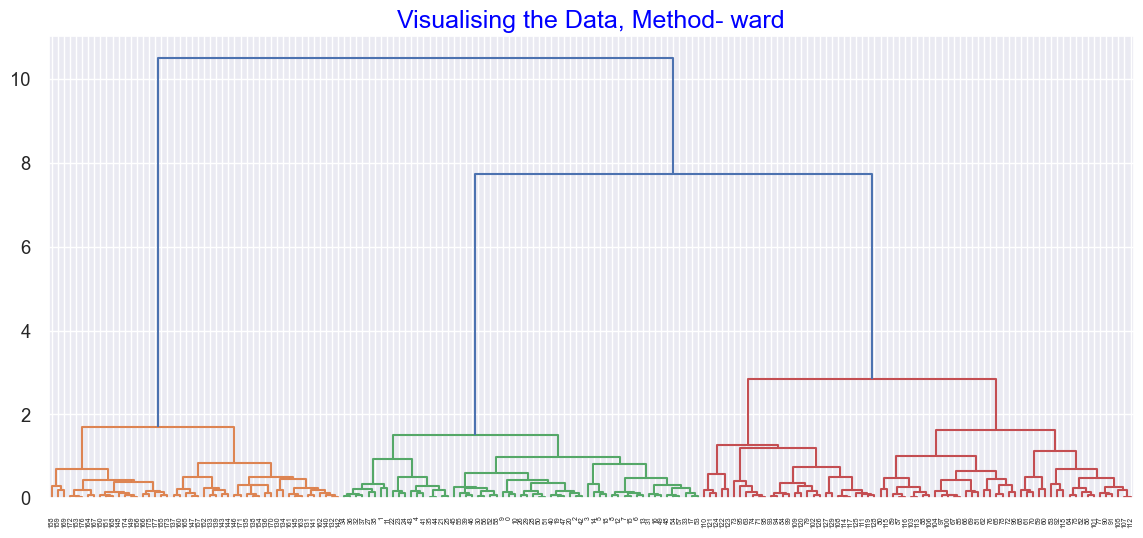

In [680]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6)) 
    
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}  
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_norm_wine, method = methods,optimal_ordering=False))

 # Silhouette Score method for PCA MinMax Scaled Data

n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_norm_wine)
        silhouette_score1 = sil(pca_norm_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

Dendrogram on Standard Scaler Applied on Data
Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.

Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding.

Ward method is commanly used since it is simpler to visualize understanding.

Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

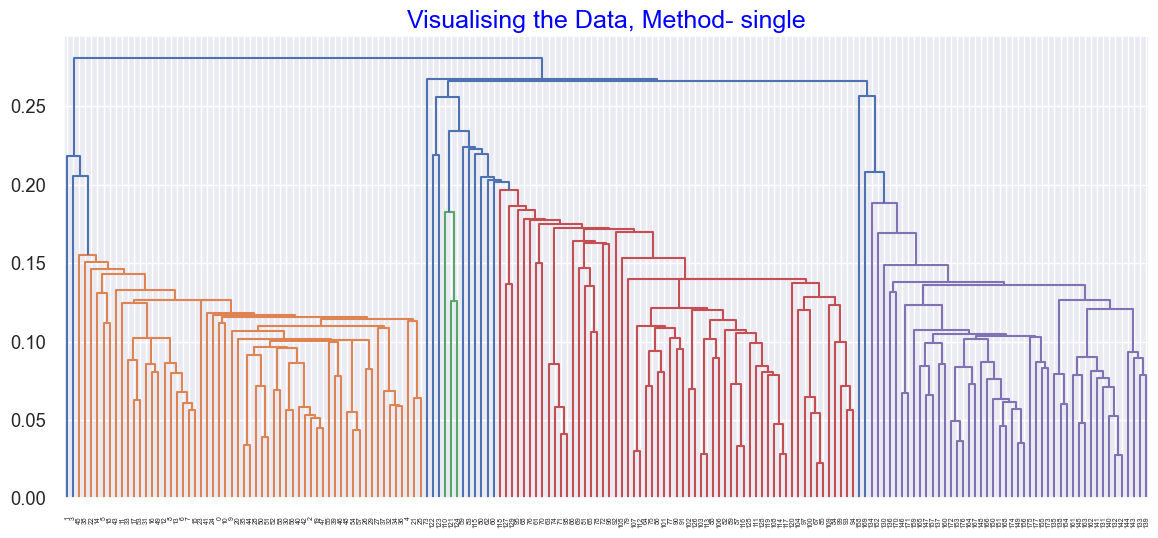

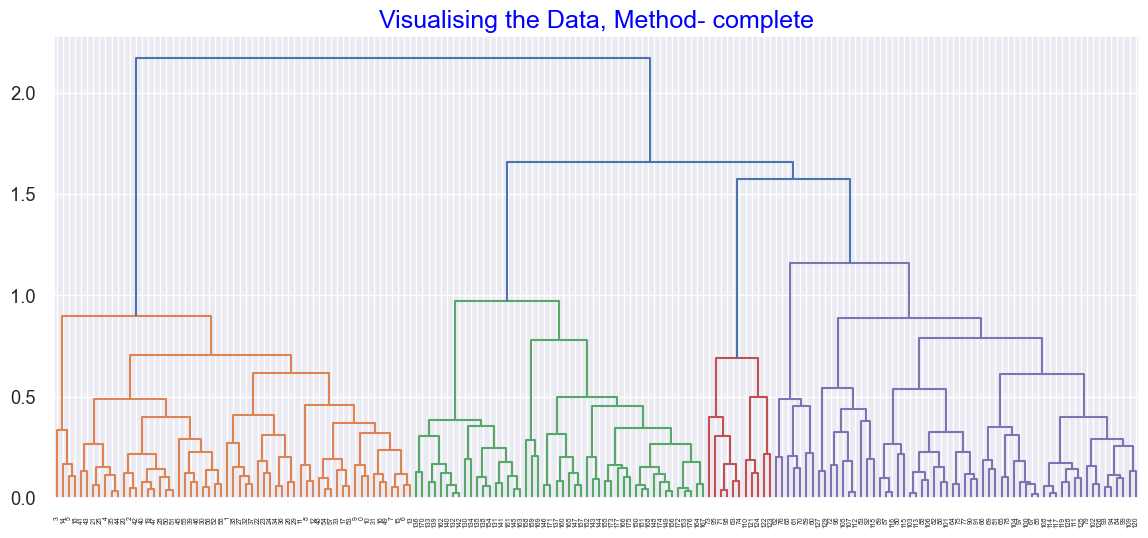

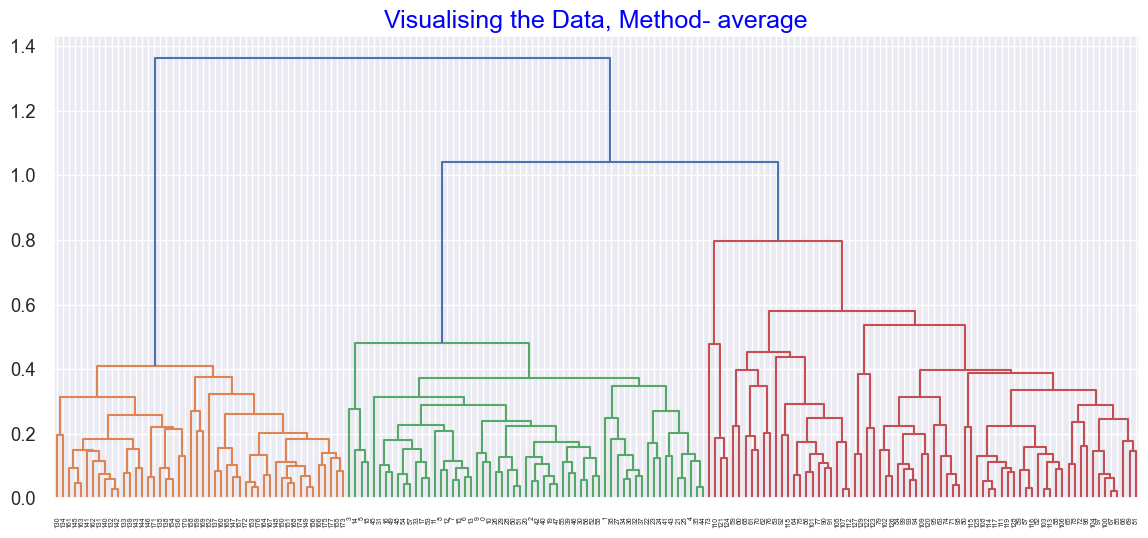

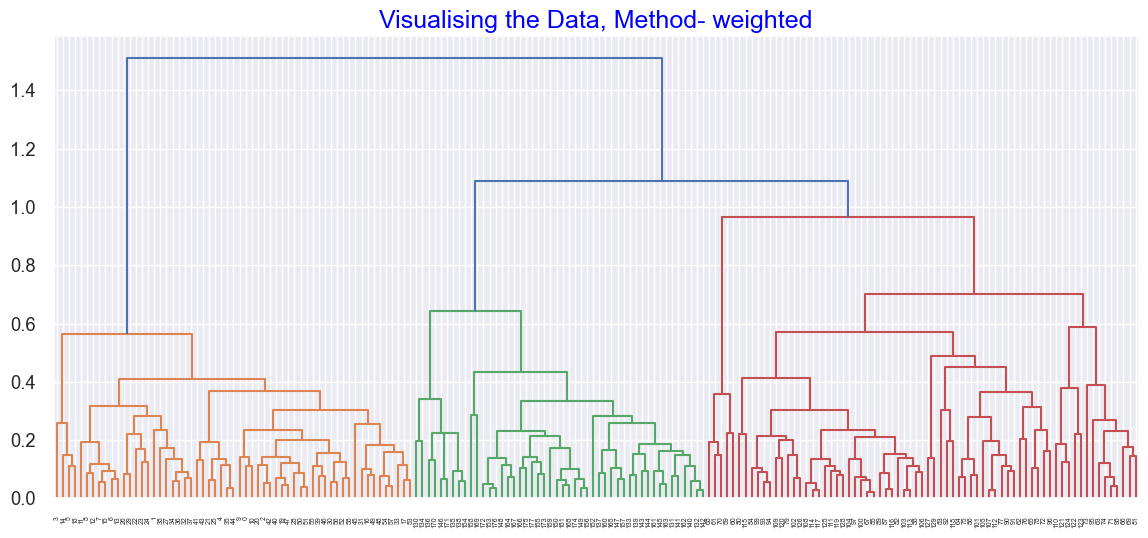

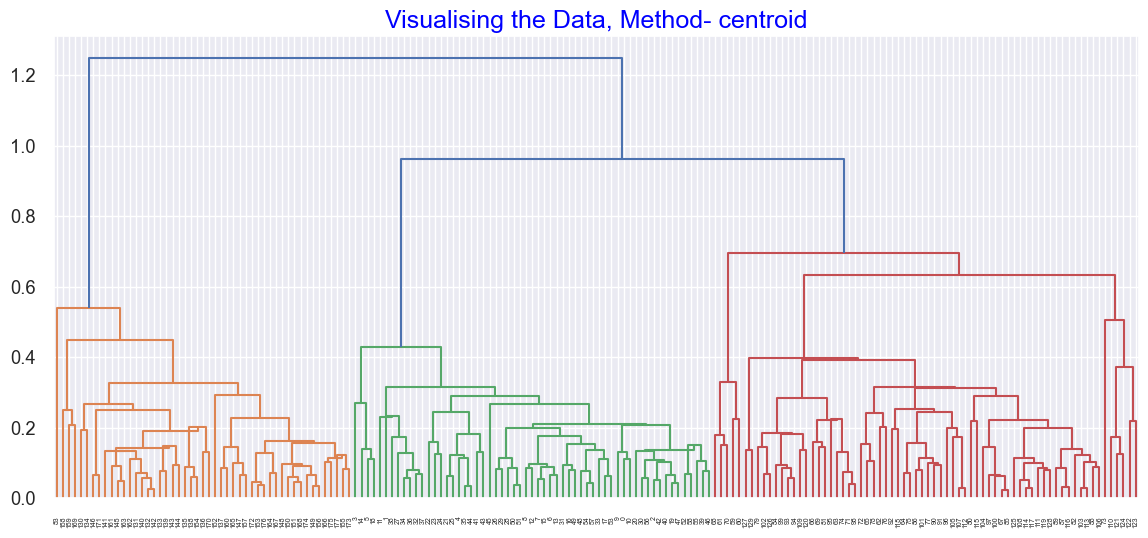

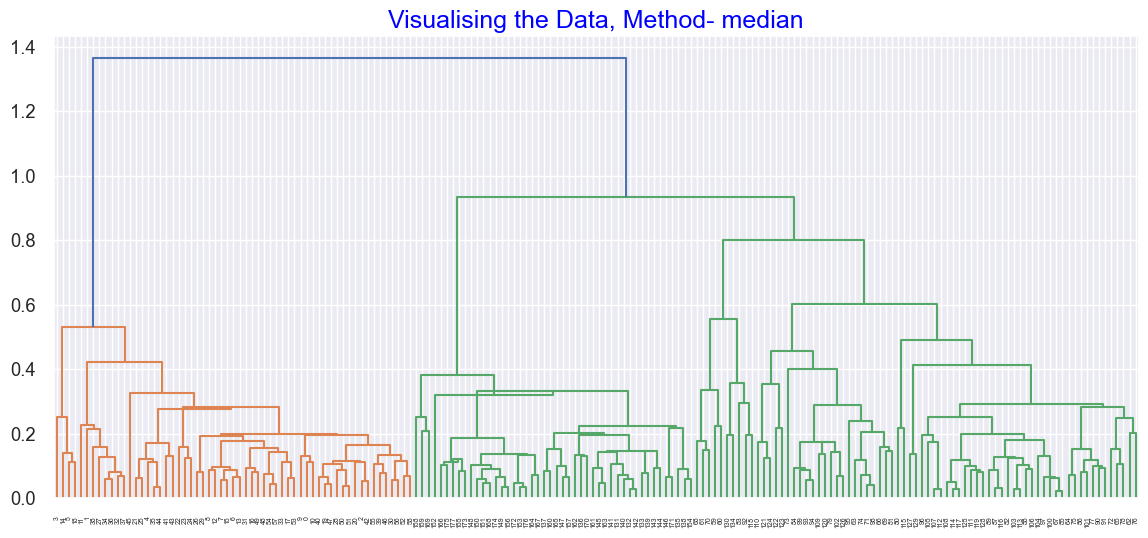

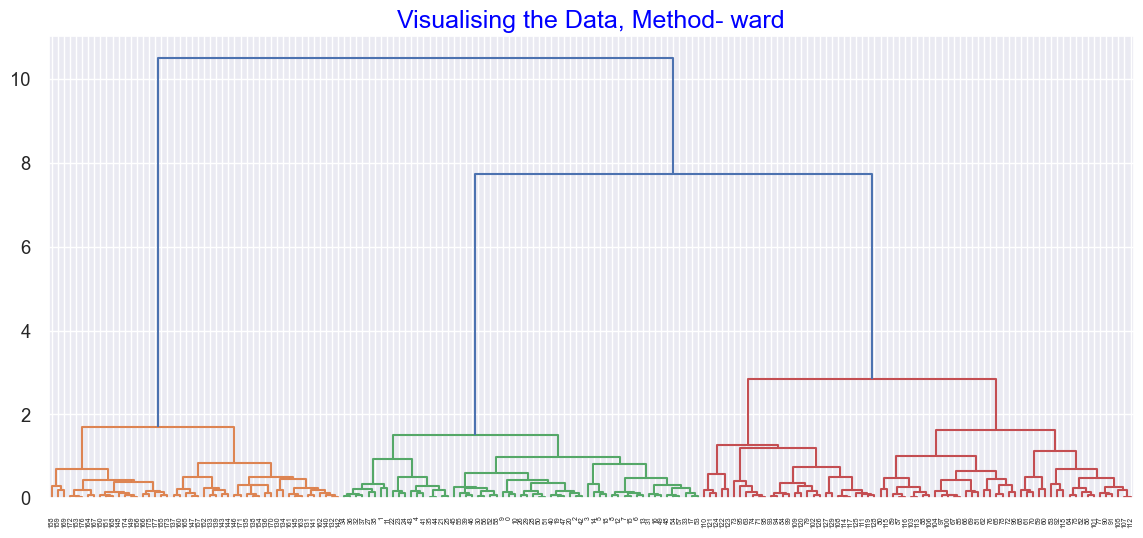

In [681]:

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))  
    
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'} 
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_wine, method = methods,optimal_ordering=False))

Silhouette Score method for PCA Standard Scaled Data
 Applying Different Linkages using Euclidean Method for distance Calculation

In [682]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_wine)
        silhouette_score1 = sil(pca_std_wine, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-", linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5155737566343558
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4942190040873051
For n_clusters = 2 The average silhouette_score with linkage- average : 0.5155737566343558
For n_clusters = 2 The average silhouette_score with linkage- single : 0.4942190040873051

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.601549277098498
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.601549277098498
For n_clusters = 3 The average silhouette_score with linkage- average : 0.601549277098498
For n_clusters = 3 The average silhouette_score with linkage- single : 0.28989847165360055

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.527412020184894
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5251633534382515
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5528160807000243
For n_cl

Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data


In [549]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete')
y_pred_hie = agg_clustering.fit_predict(pca_std_wine)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [550]:
agg_clustering.n_clusters_

4

In [551]:
(sil(pca_std_wine, agg_clustering.labels_)*100).round(3)


52.516

In [552]:
wine_df['Hierarchical_Labels'] = agg_clustering.labels_
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,Hierarchical_Labels
ID,,,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,1
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,1
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,1
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,1
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1


In [553]:
wine_df.groupby('Hierarchical_Labels').agg(['mean'])


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,
0,2.0,12.256833,1.815000,2.217500,19.790000,92.566667,2.119833,1.921000,0.381167,1.518167,3.021333,1.063933,2.722333,507.250000,0.016667
1,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000
2,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,1.000000
3,2.0,12.398182,2.574545,2.393636,22.681818,105.363636,3.017273,2.952727,0.268182,2.241818,3.442727,1.014545,3.129091,586.363636,0.181818


Plotting barplot using groupby method to get visualize how many row no. in each cluster

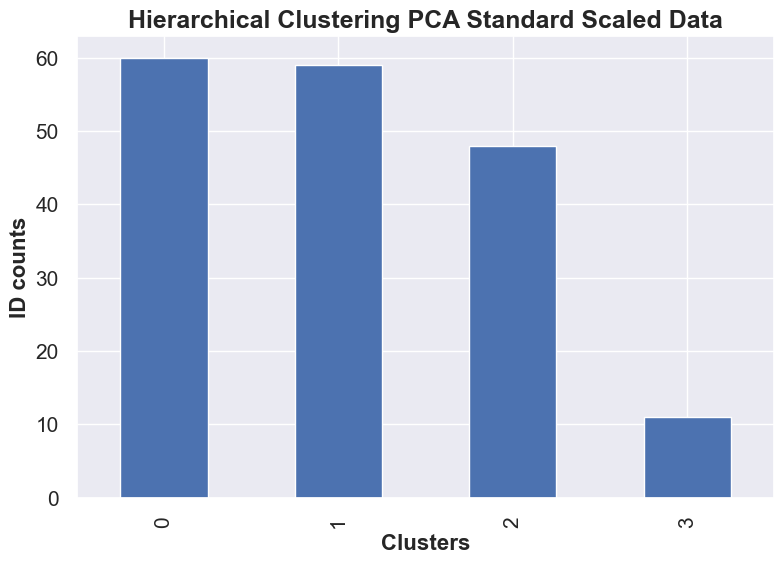

In [554]:
fig, ax = plt.subplots(figsize=(9,6))
wine_df.groupby(['Hierarchical_Labels']).count()['Type'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Standard Scaled Data',fontsize= 18,fontweight='bold')
ax.set_xlabel('Clusters', fontweight='bold', fontsize=16)
ax.set_ylabel('ID counts', fontweight='bold', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

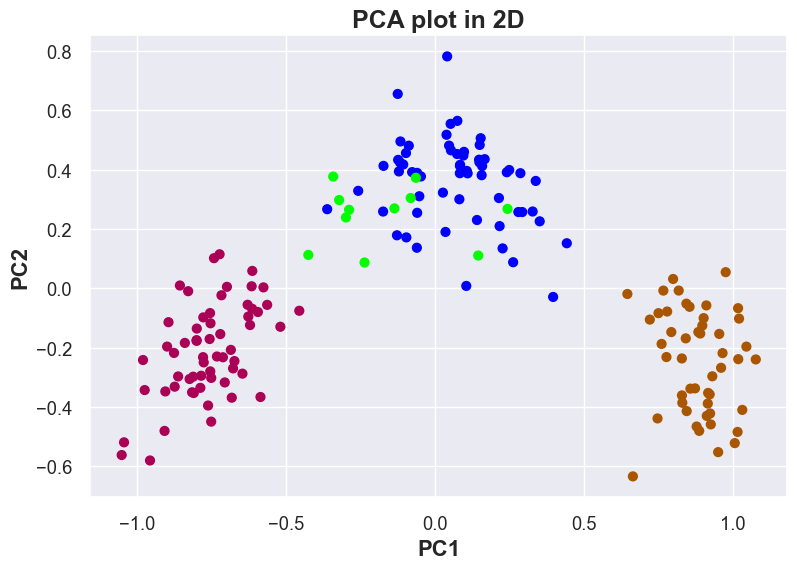

In [555]:
plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)

plt.title('PCA plot in 2D',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()


We cannot now clearly see the 4 number of clusters formed

Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

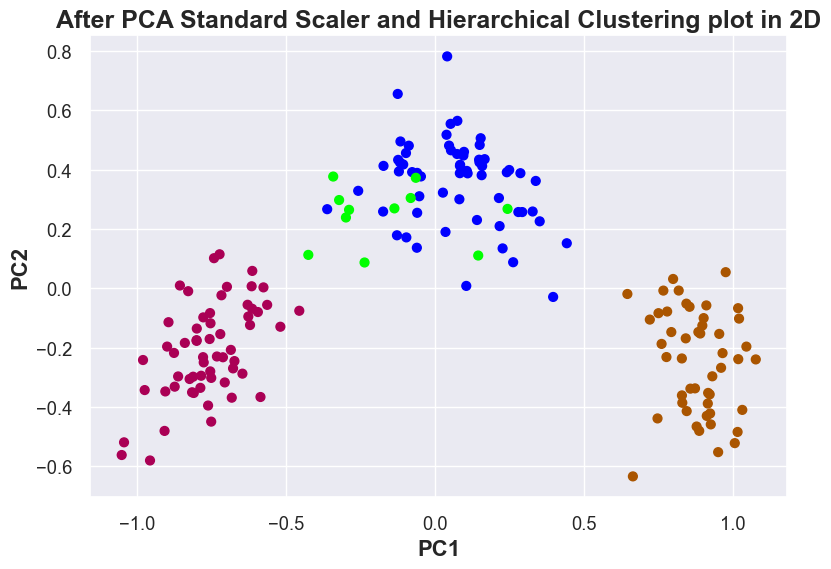

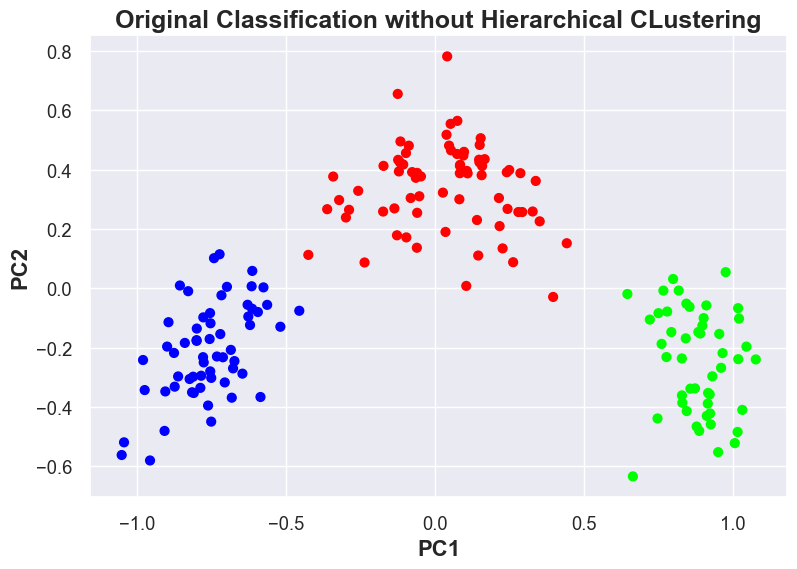

In [556]:
plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine_data['Type'], cmap="brg", s=40)
plt.title('Original Classification without Hierarchical CLustering', fontweight='bold', fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()


Conclusion: 

I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
I have used & analyzed two clustering techniques here..i) KMeans ii) Hierarchical Clusterig
By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.